In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')


file_path = "churn_clean.csv"
df = pd.read_csv(file_path)

df.info(file_path)

df.duplicated()

print(df.duplicated().value_counts())

df.isnull().sum()

#Drop the less meaningful columns
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
                      'Lat', 'Lng', 'TimeZone', 'Job','Marital', 'Contract', 'Port_modem', 'Tablet',
                      'InternetService', 'Phone', 'Multiple',
                      'OnlineSecurity', 'OnlineBackup', 'Area','DeviceProtection', 'StreamingTV',
                      'StreamingMovies', 'PaperlessBilling',
                      'PaymentMethod', 'Bandwidth_GB_Year', 'Item1', 'Item2',
                      'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

# Display the dimension of dataframe
df.shape

# display data set with all the columns
df.head()

# Function to classify columns as numerical or categorical
def classify_columns(df):
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    return numerical_cols, categorical_cols

# Get lists of numerical and categorical columns
numerical_columns, categorical_columns = classify_columns(df)

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

numerical_columns = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
                     'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge']

# Summarize numerical variables
numerical_summary = df[numerical_columns].describe()

print("Summary Statistics for Numerical Variables:")
print(numerical_summary)

# Categorical columns
categorical_columns = ['Gender', 'Churn', 'Techie', 'TechSupport']

# Summarize categorical variables
for col in categorical_columns:
    print(f"Summary for '{col}':")
    print("Counts:")
    print(df[col].value_counts())
    print("\nPercentages:")
    print(df[col].value_counts(normalize=True) * 100)
    print("\n" + "-"*50 + "\n")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

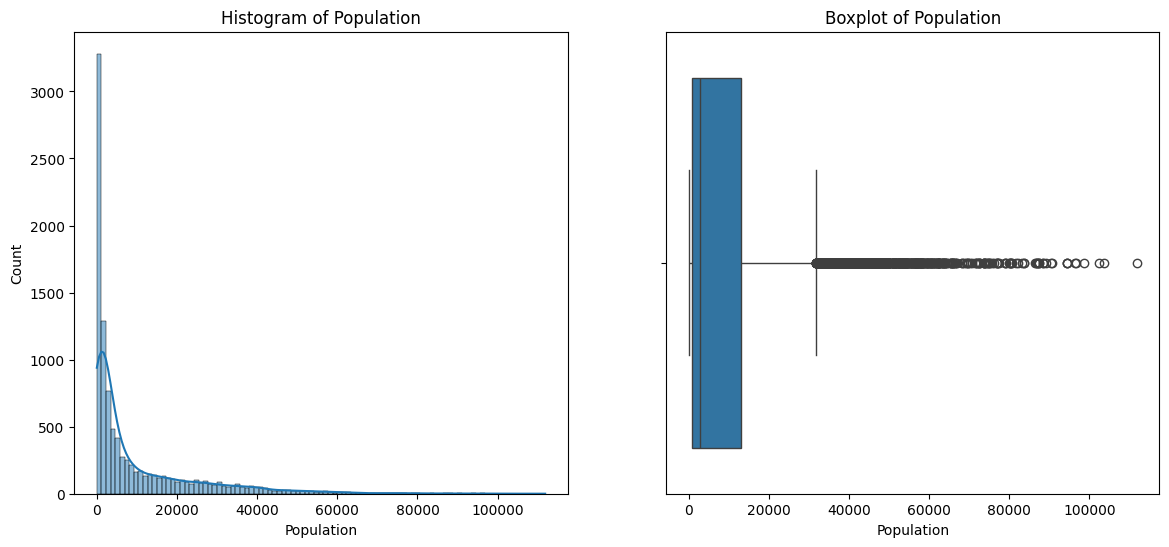

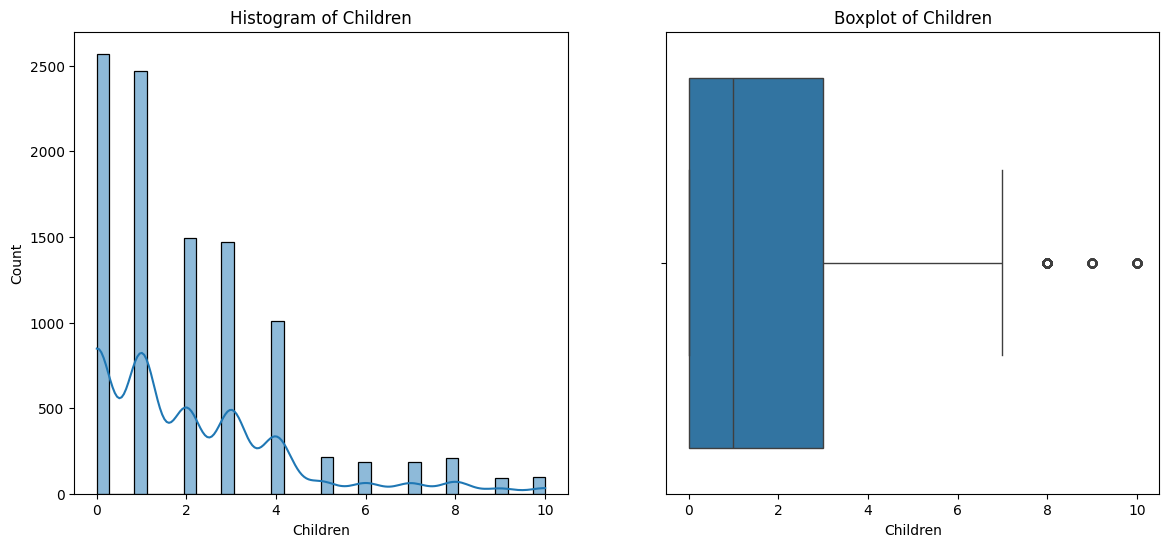

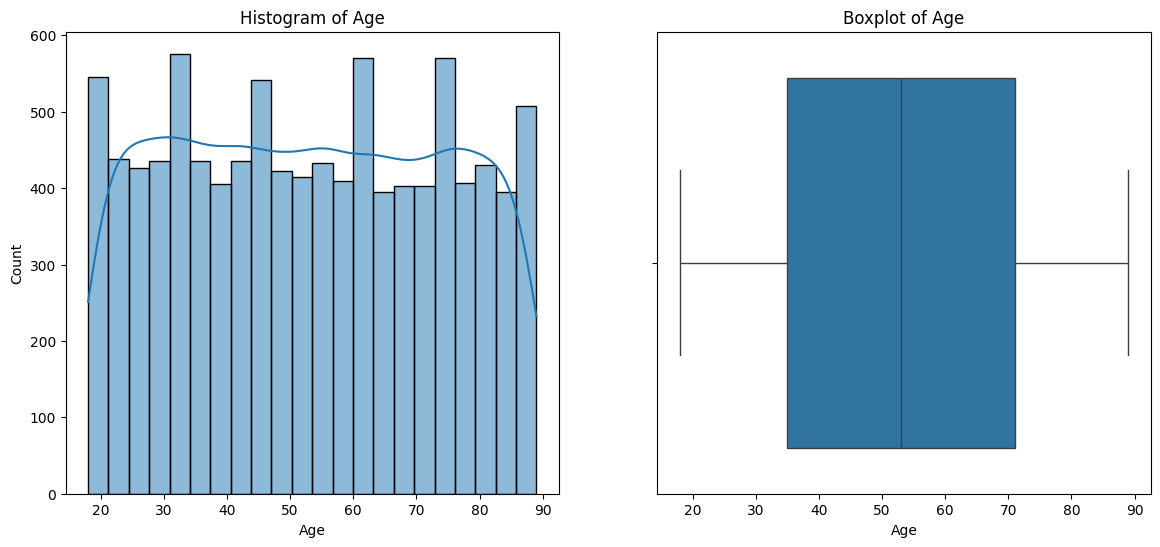

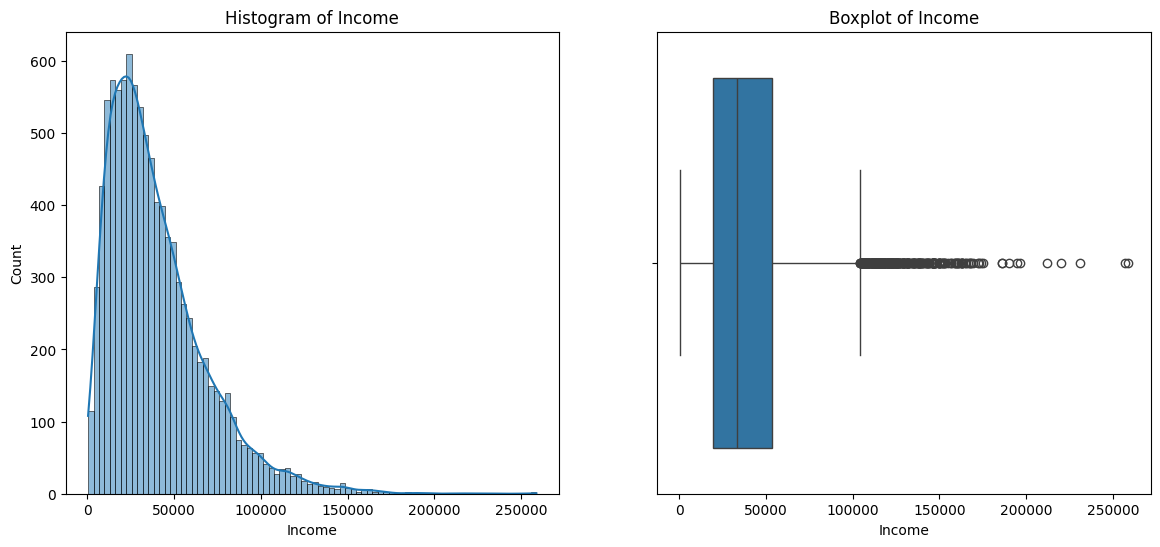

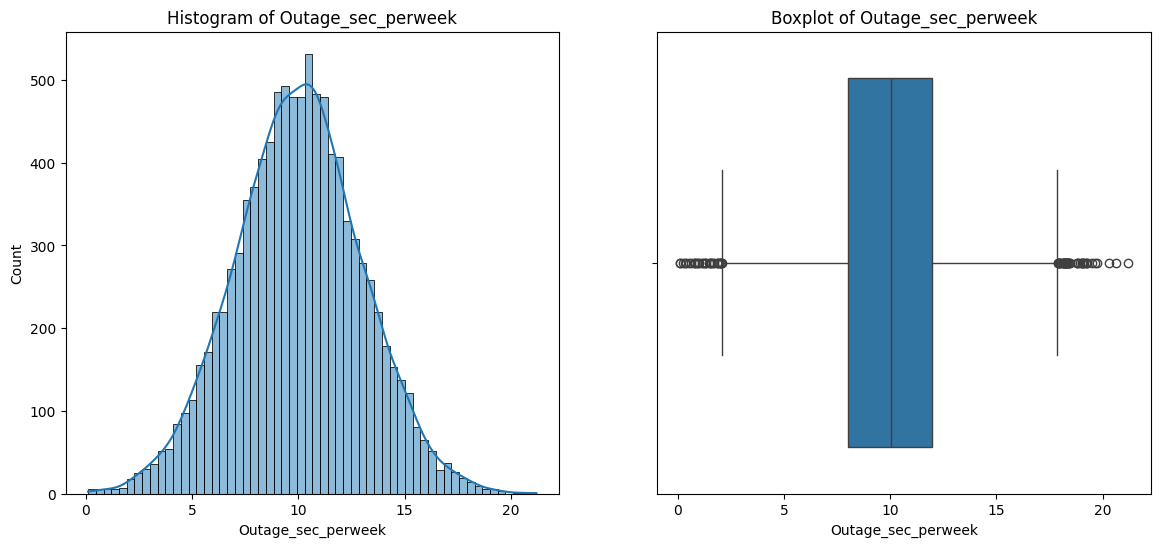

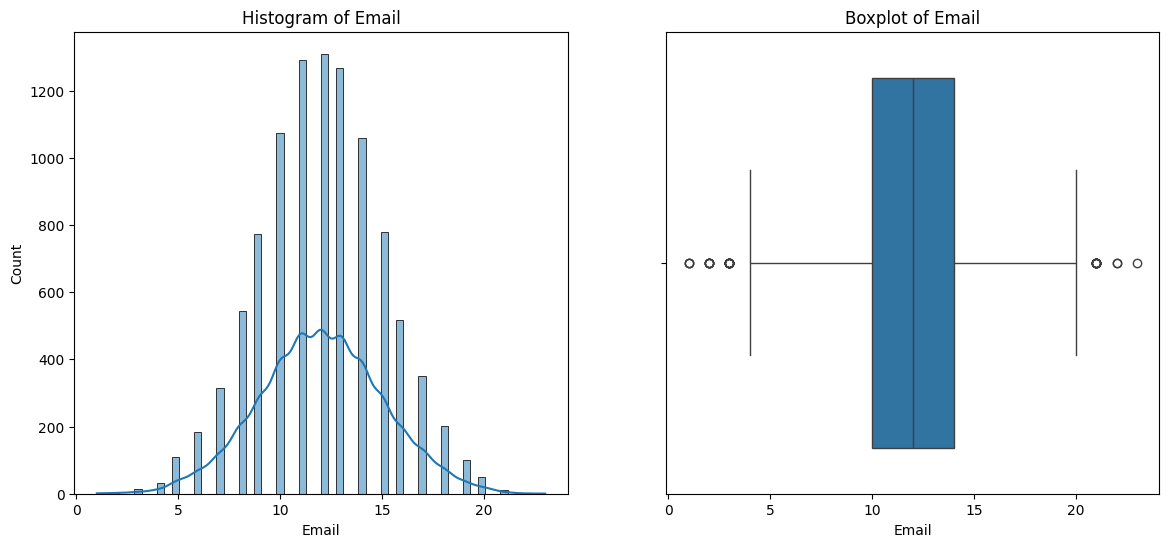

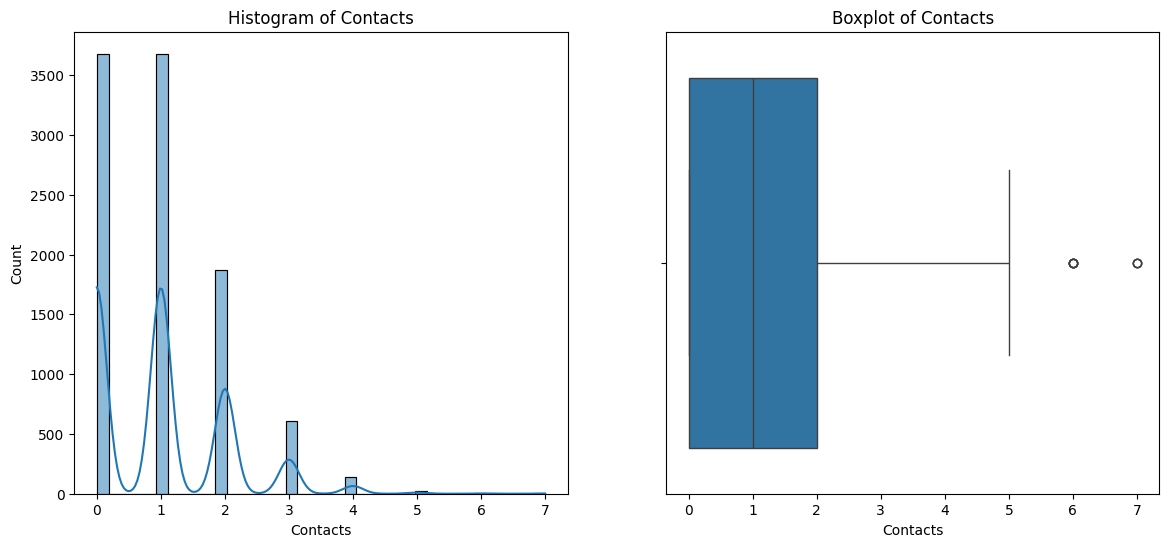

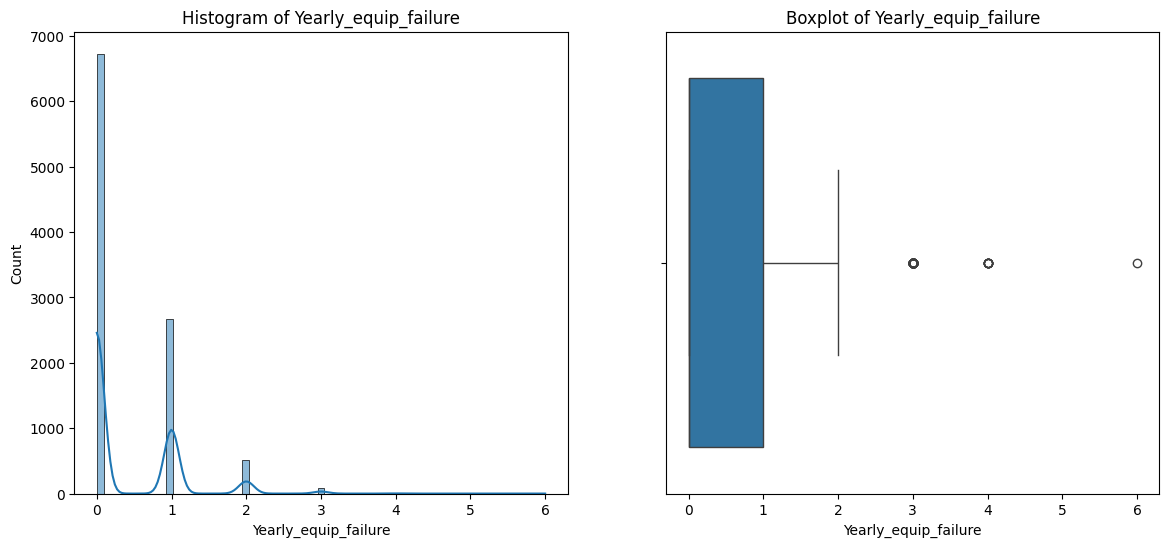

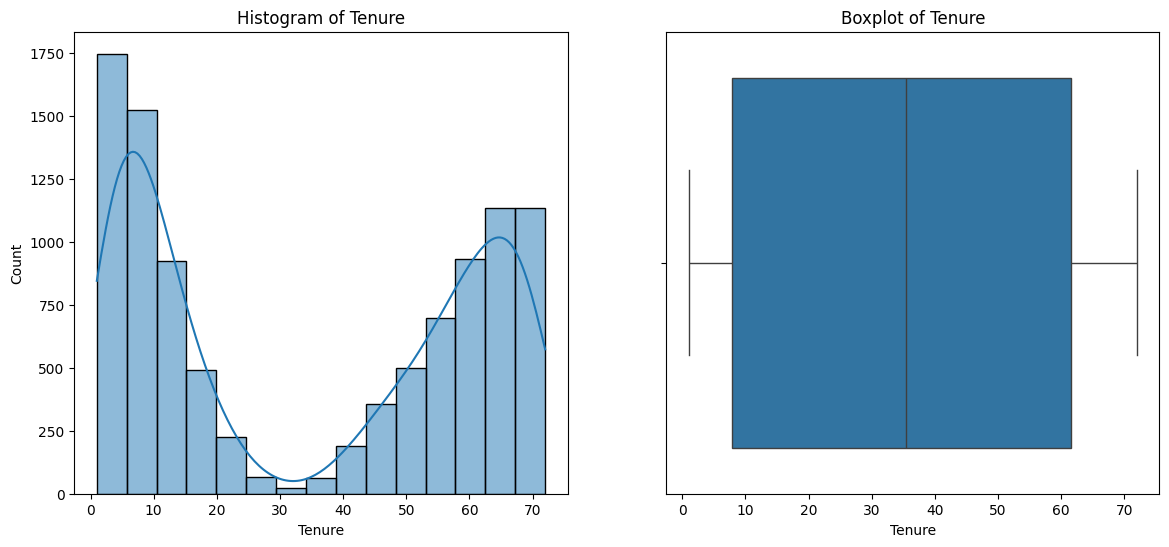

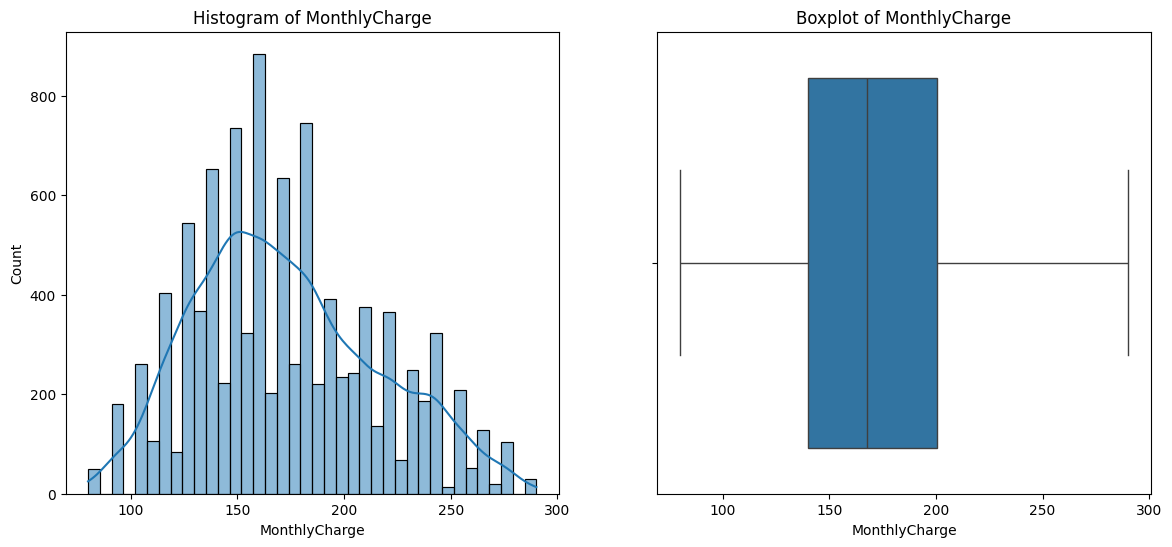

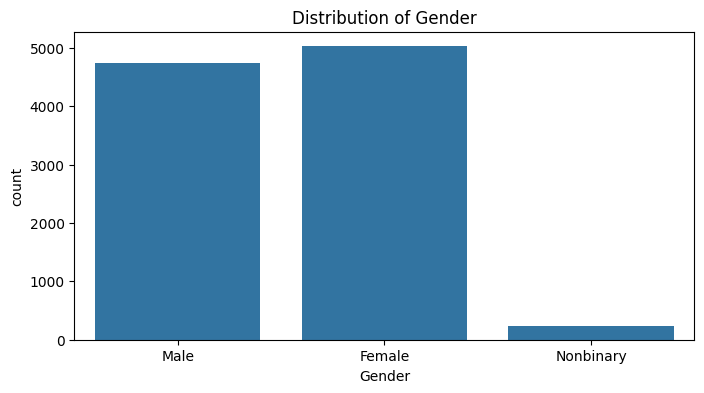

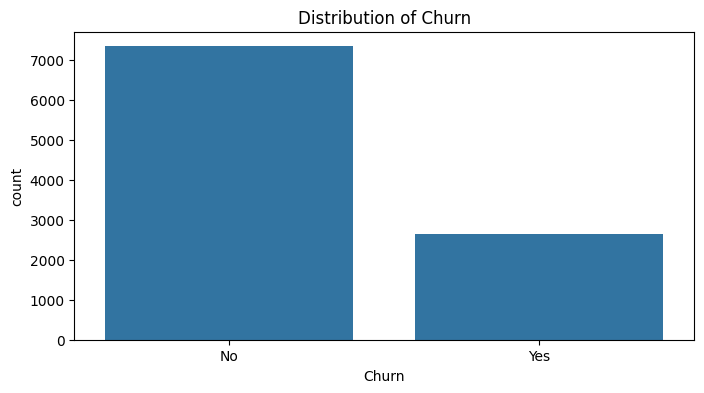

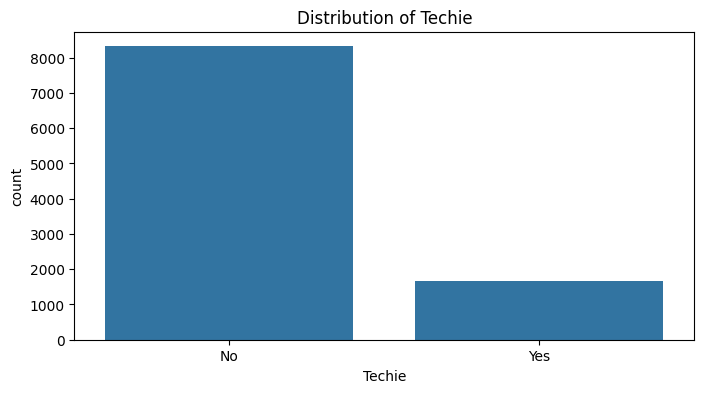

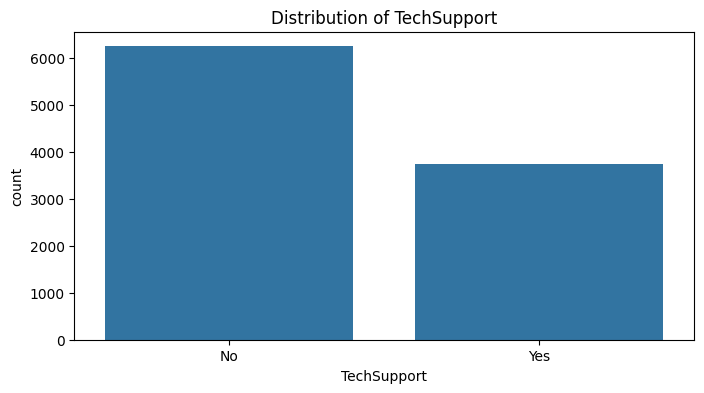

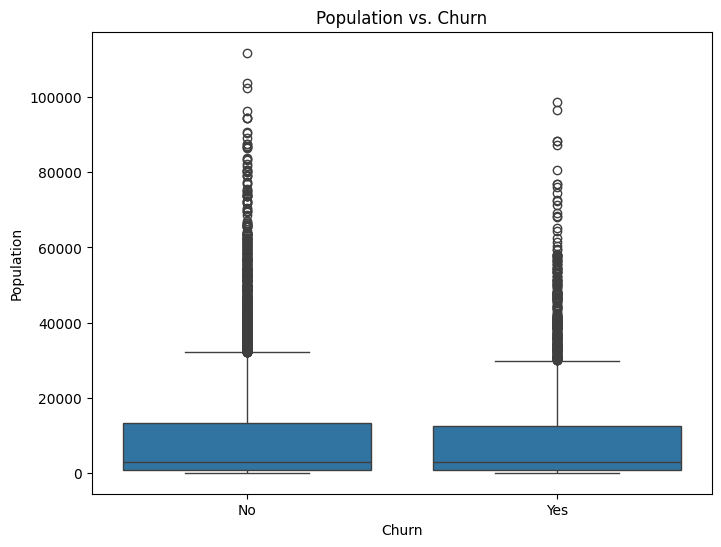

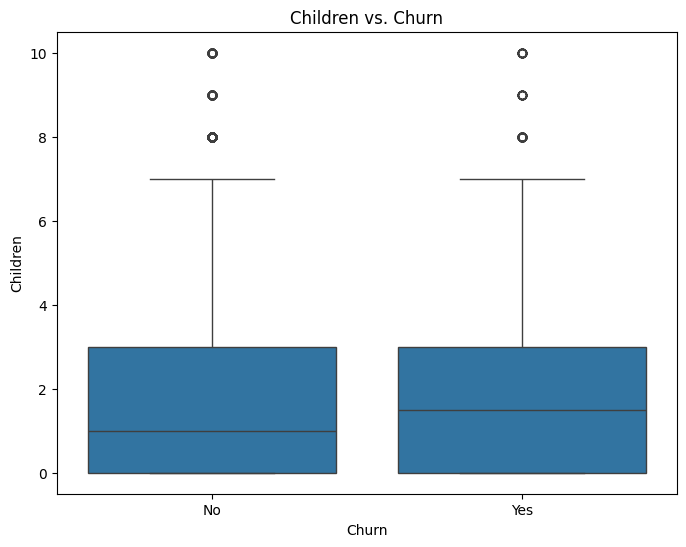

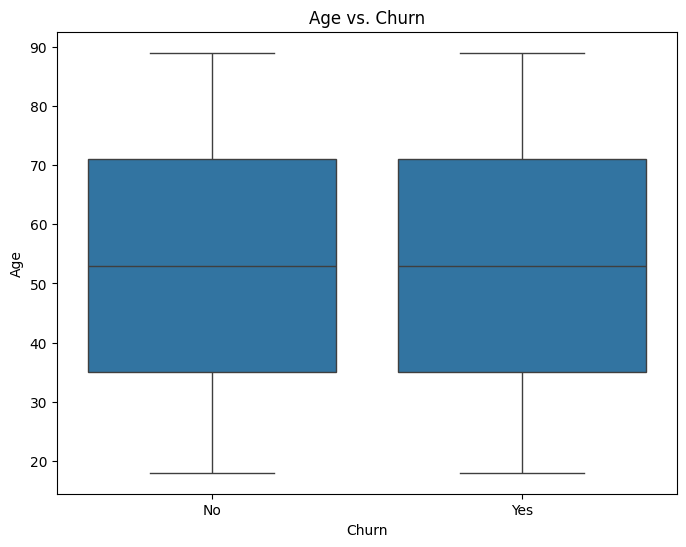

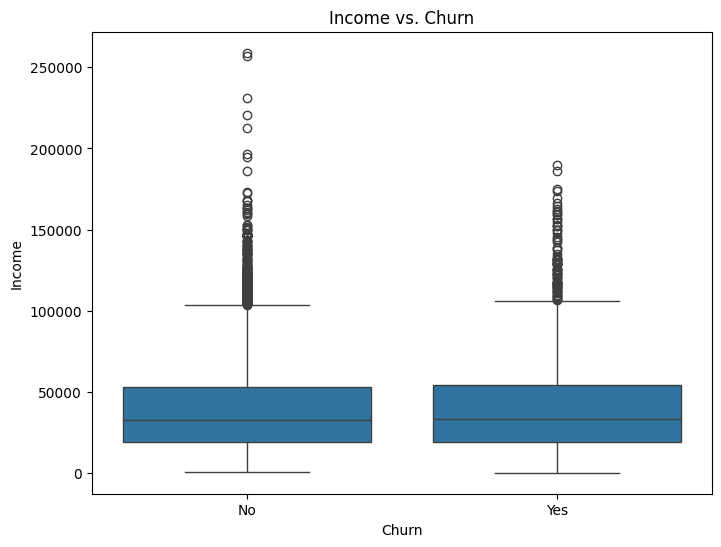

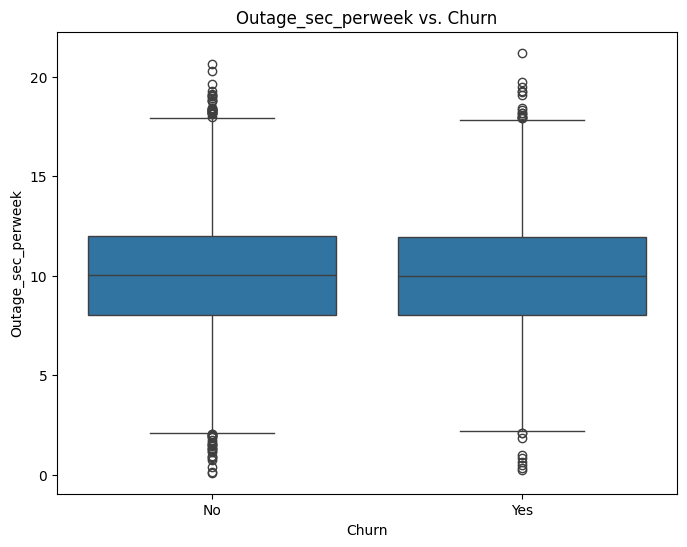

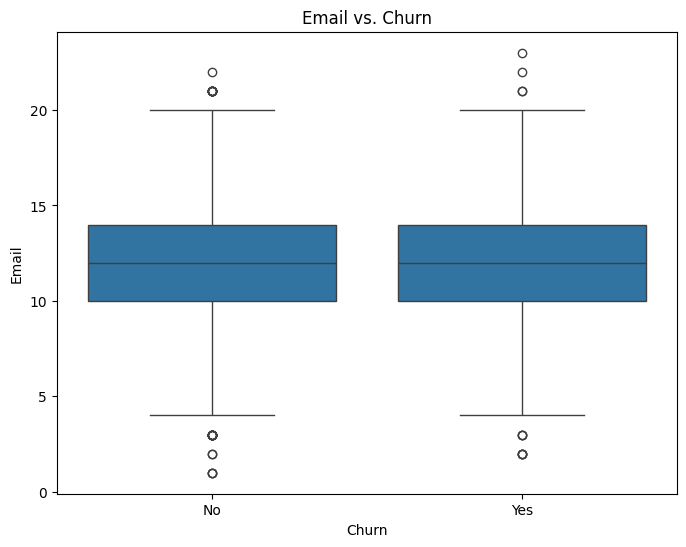

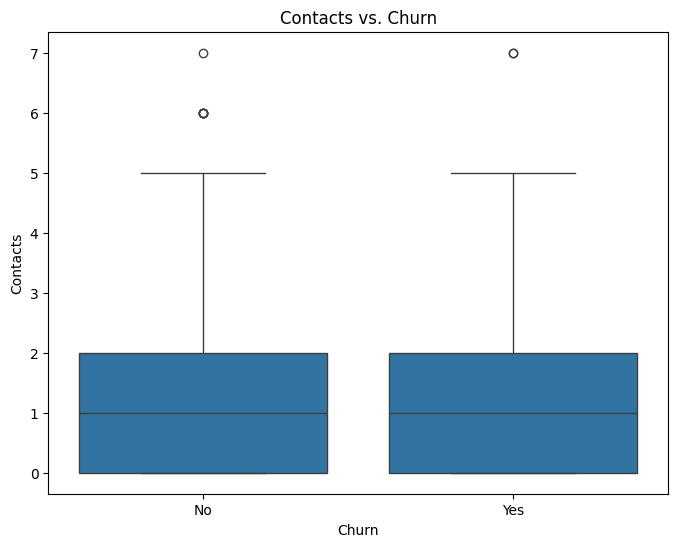

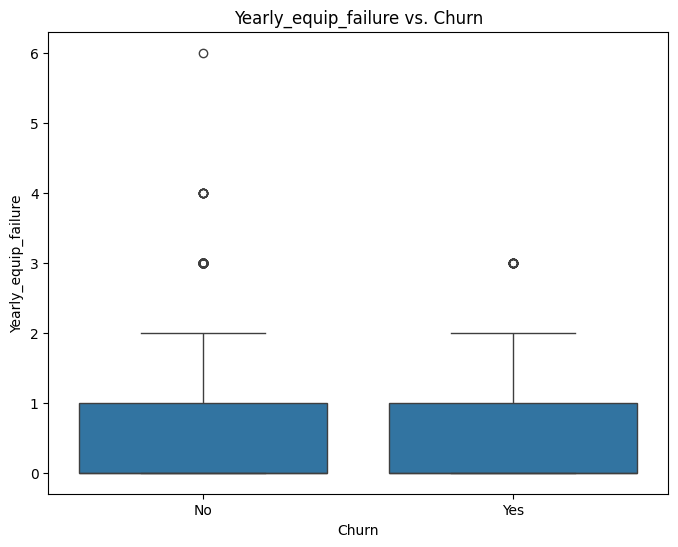

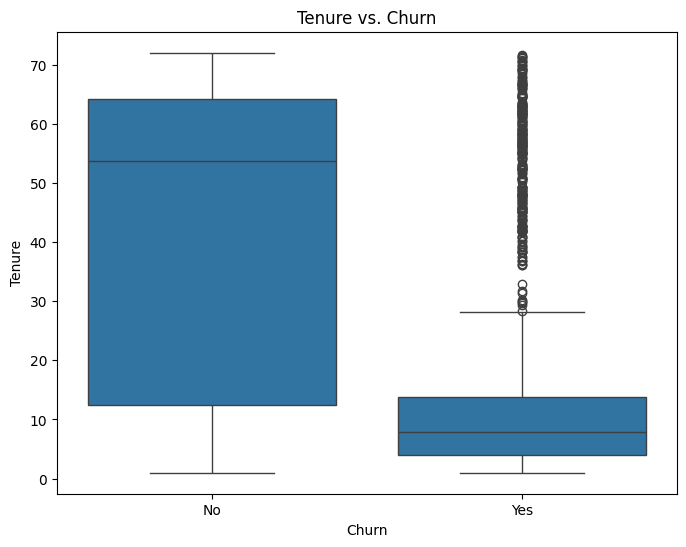

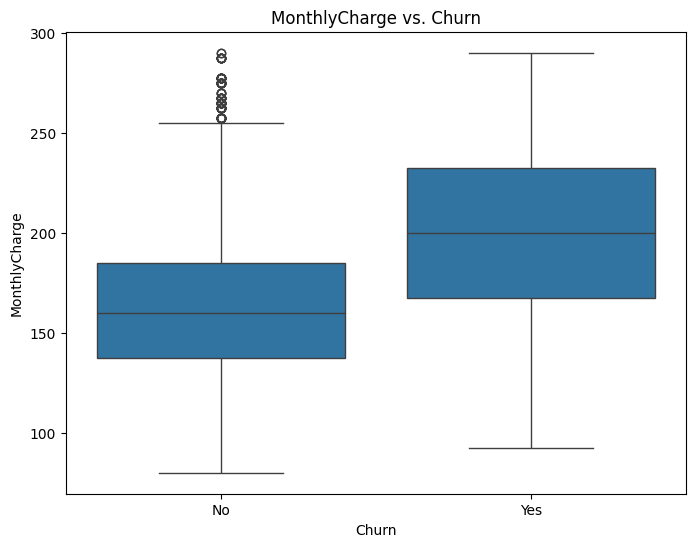

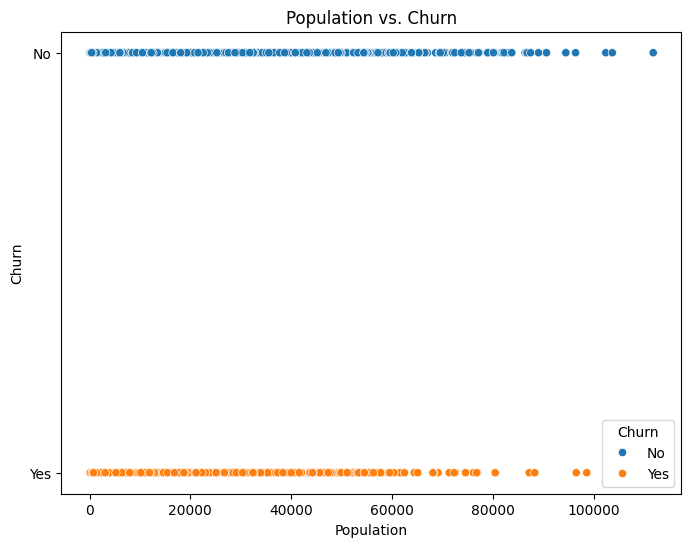

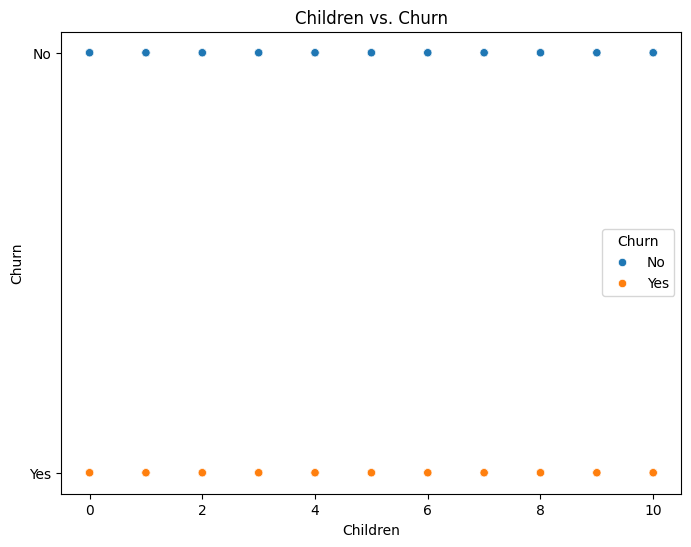

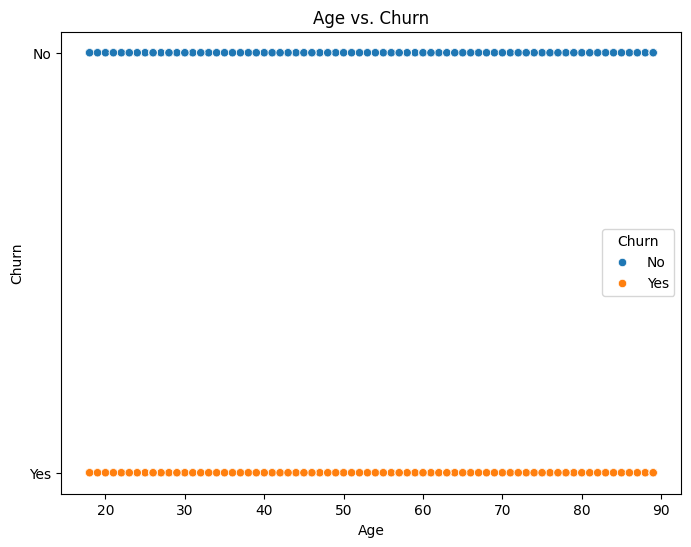

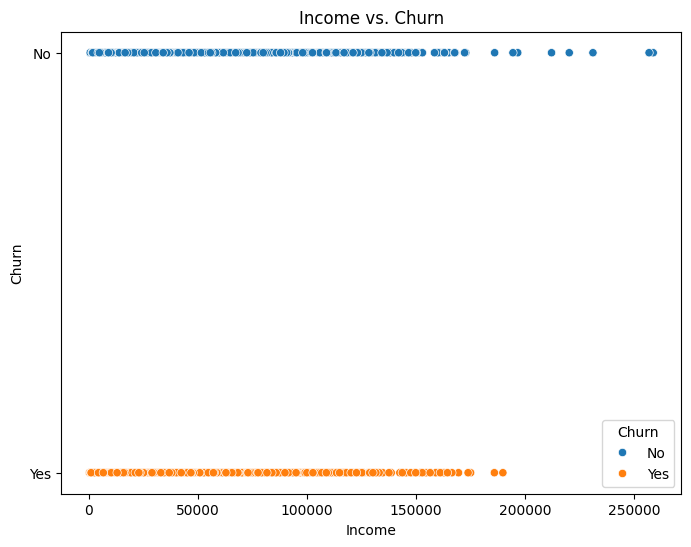

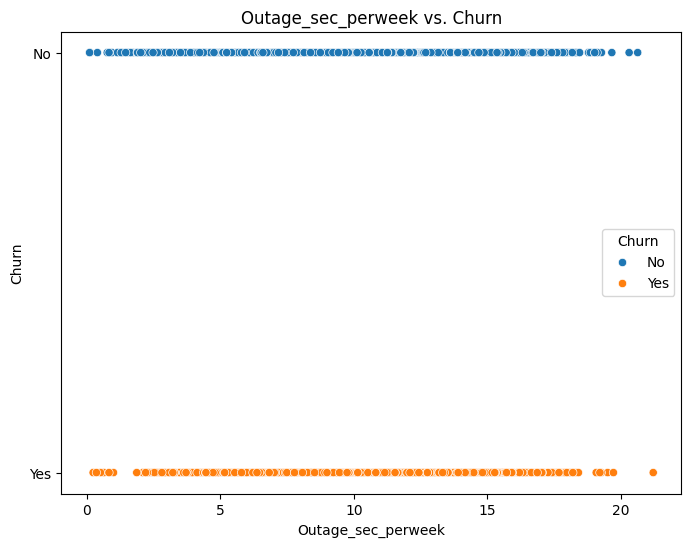

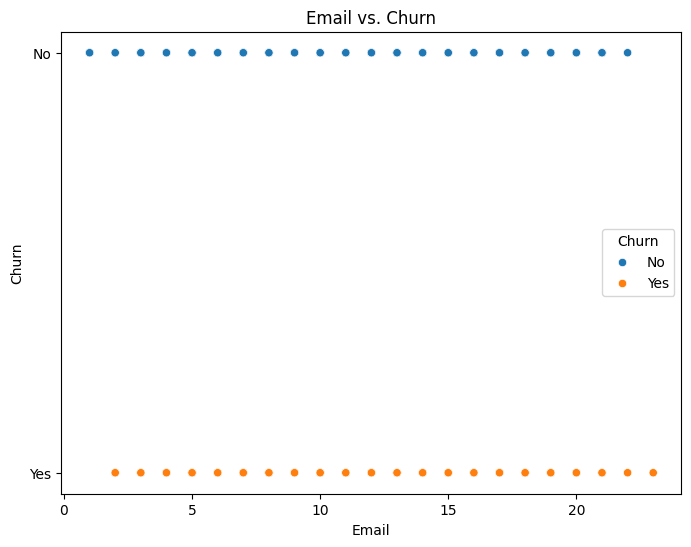

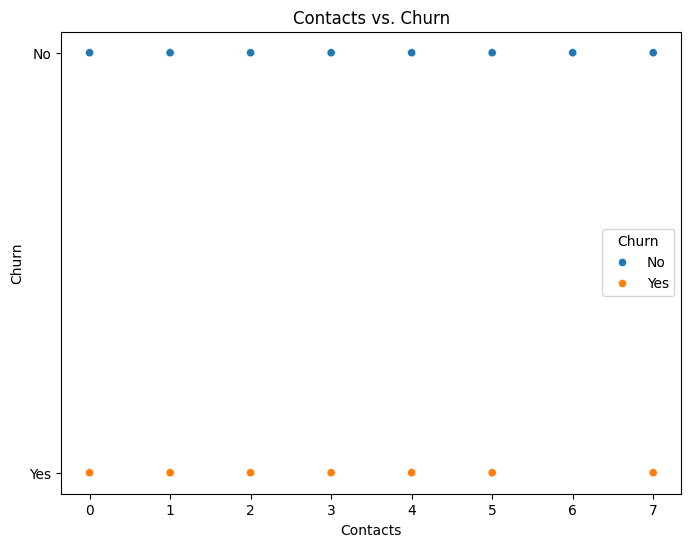

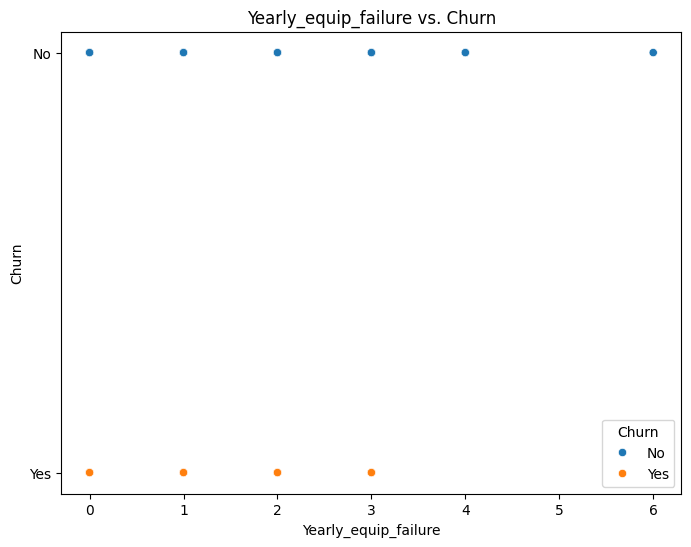

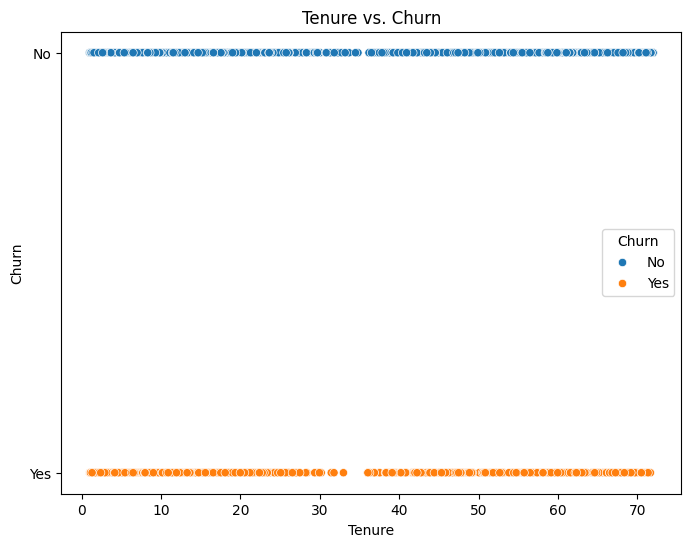

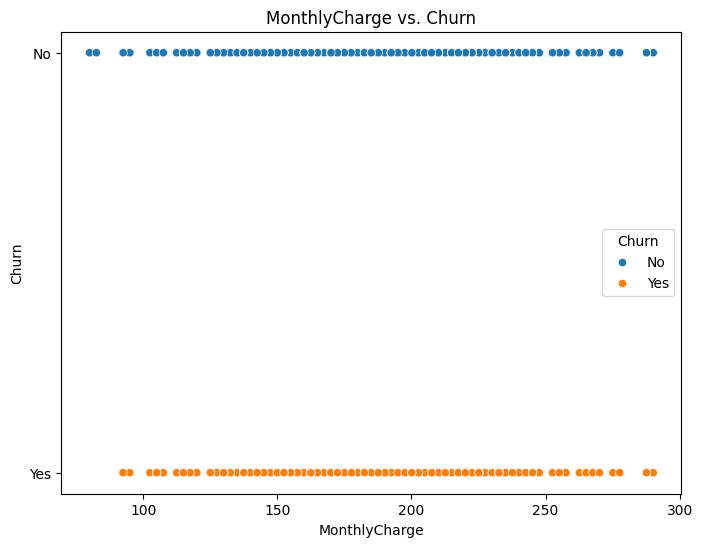

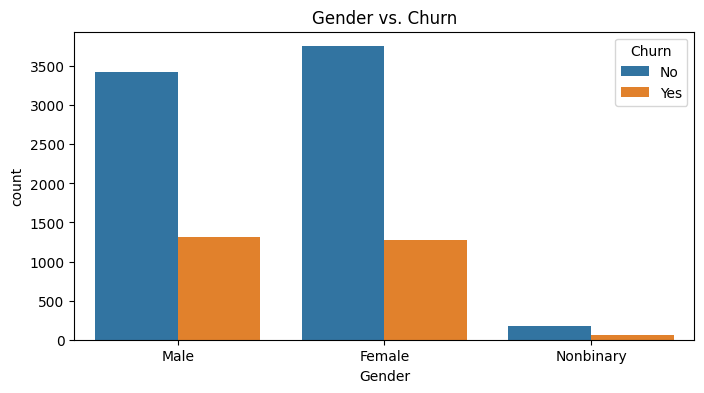

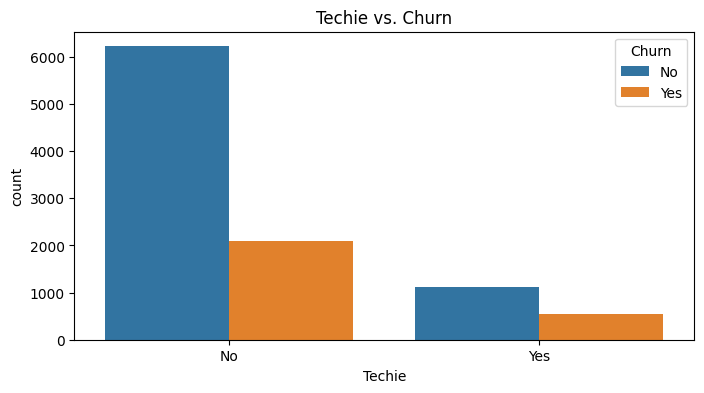

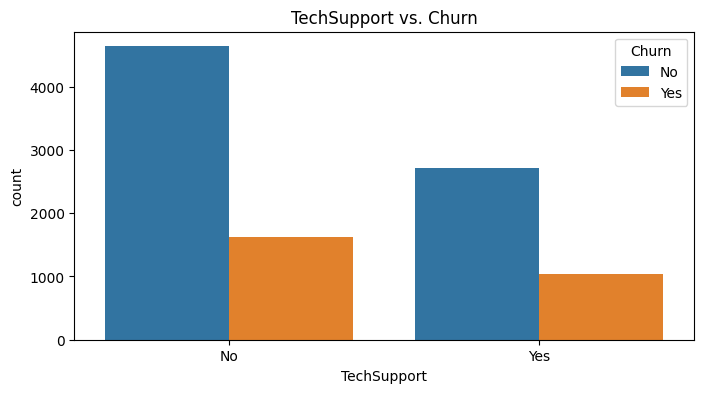

In [16]:
# Univariate Visualization

# -- For the numerical variables, histograms and boxplots are commonly used.
for col in numerical_columns:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

# 2. Categorical Variables
# For categorical variables, bar plots are most informative.

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bivariate Visualizations with Churn

# 1. Numerical Variables vs. Churn
# Boxplots can show the distribution of numerical variables across the Churn categories.

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs. Churn')
    plt.show()

# Scatter plots can also be informative for relationships between numerical variables and Churn.
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Churn', data=df, hue='Churn')
    plt.title(f'{col} vs. Churn')
    plt.show()

# 2. Categorical Variables vs. Churn
# For categorical variables, you can use bar plots to visualize the relationship with Churn.

for col in categorical_columns:
    if col != 'Churn':
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue='Churn', data=df)
        plt.title(f'{col} vs. Churn')
        plt.show()

Missing values in X: const                   0
Population              0
Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
TechSupport             0
Tenure                  0
MonthlyCharge           0
Gender_Male             0
Gender_Nonbinary        0
Techie_TechSupport      0
dtype: int64
Missing values in y: 0
Optimization terminated successfully.
         Current function value: 0.337934
         Iterations 8
Initial Model Summary:
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                  0.4156
Time:  

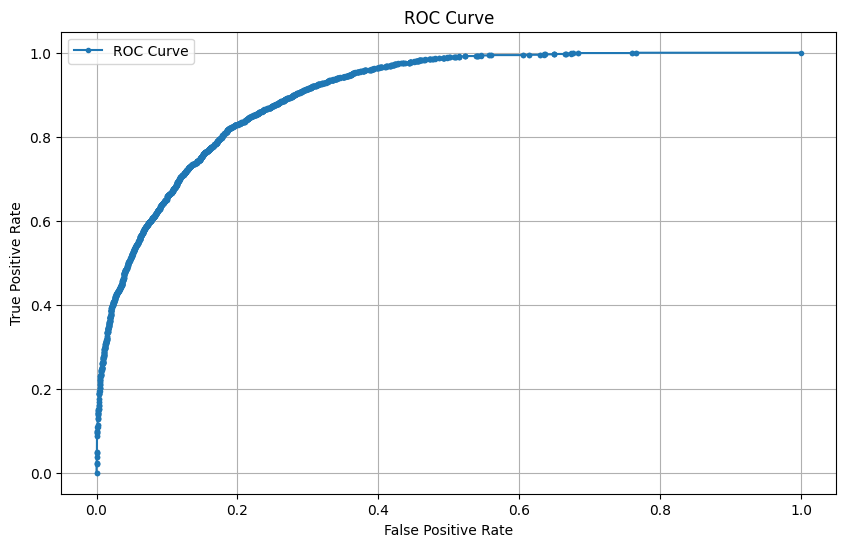

In [17]:
# Data Transformation
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])  # 0 = No, 1 = Yes
df['Techie'] = label_encoder.fit_transform(df['Techie'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])

# One-hot encode 'Gender'
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Feature Engineering: Interaction Term
df['Techie_TechSupport'] = df['Techie'] * df['TechSupport']

# Save prepared dataset
df.to_csv('prepared_churn_dataset.csv', index=False)

# Initial Logistic Regression Model
X = df.drop('Churn', axis=1)
y = df['Churn']
X = sm.add_constant(X)

# Ensure all boolean columns are converted to integers
X = X.astype({col: 'int' for col in X.select_dtypes(include=['bool']).columns})

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Check for missing data
print("Missing values in X:", X.isnull().sum())
print("Missing values in y:", y.isnull().sum())

# Drop any rows with missing values
X = X.dropna()
y = y.loc[X.index]

# Fit the initial logistic regression model
initial_model = sm.Logit(y, X).fit()
print("Initial Model Summary:")
print(initial_model.summary())

# Feature Selection and Reduced Model
current_model = initial_model
significant_level = 0.05
while True:
    p_values = current_model.pvalues
    max_p_value = p_values.max()
    max_p_var = p_values.idxmax()

    if max_p_value > significant_level:
        X = X.drop(columns=max_p_var)
        current_model = sm.Logit(y, X).fit()
    else:
        break

print("Reduced Model Summary:")
print(current_model.summary())

# Model Evaluation
# Predict probabilities for the reduced model
y_pred_prob = current_model.predict(X)

# Convert probabilities to binary outcomes (threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix and Accuracy
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_prob)

print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
